# Intermediate Activation Analysis

### Details
- The model takes in 180 x 180 full color (rgb) images
- The model will store all the intermediate layers' output
- We will visualize the model's intermediate layers on a completely new image

In [1]:
# imports
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model = keras.models.load_model("convnet_from_scratch.keras")
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [3]:
img_path = keras.utils.get_file(fname="cat.jpg", origin="https://img-datasets.s3.amazonaws.com/cat.jpg")
img = keras.utils.load_img(img_path, target_size=(180, 180))
img_tensor = np.expand_dims(keras.utils.img_to_array(img), axis=0)

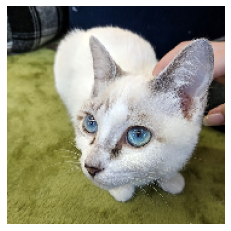

In [4]:
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))

In [5]:
layer_outputs, layer_names = [], []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 194ms/step


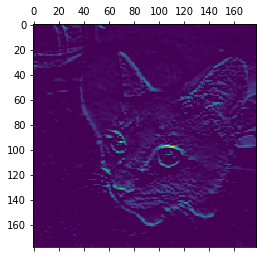

In [6]:
plt.matshow(activations[0][0,:,:,5], cmap="viridis")

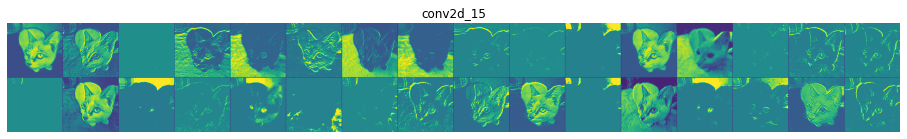

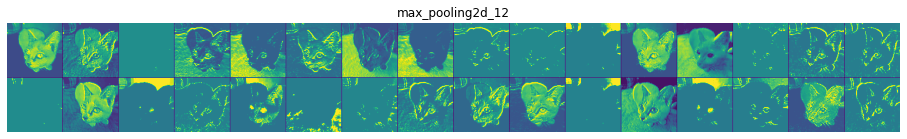

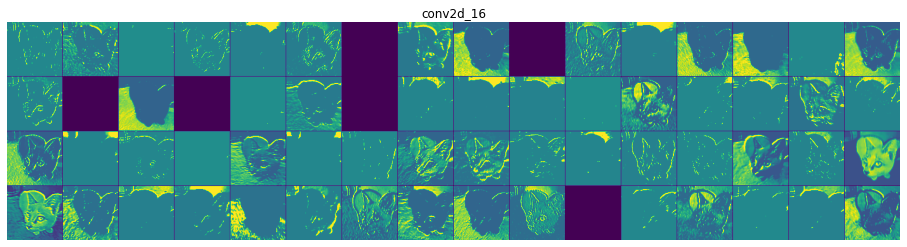

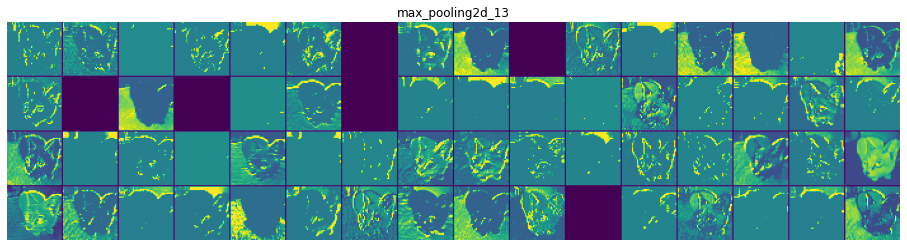

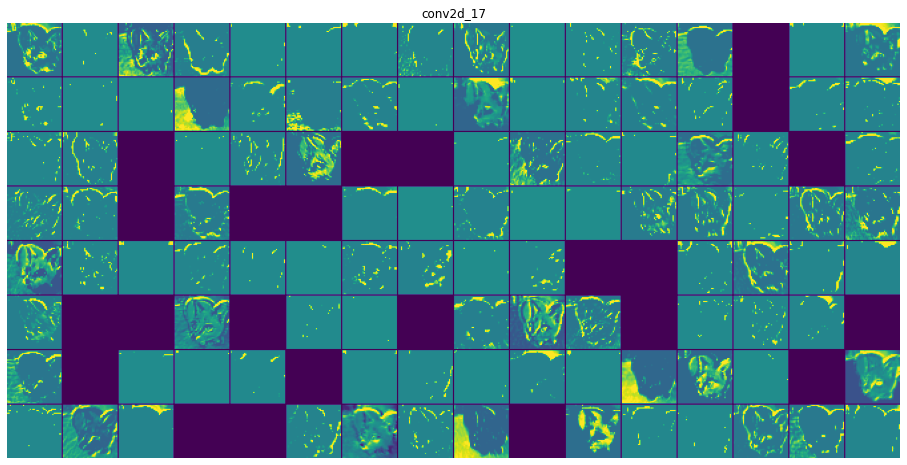

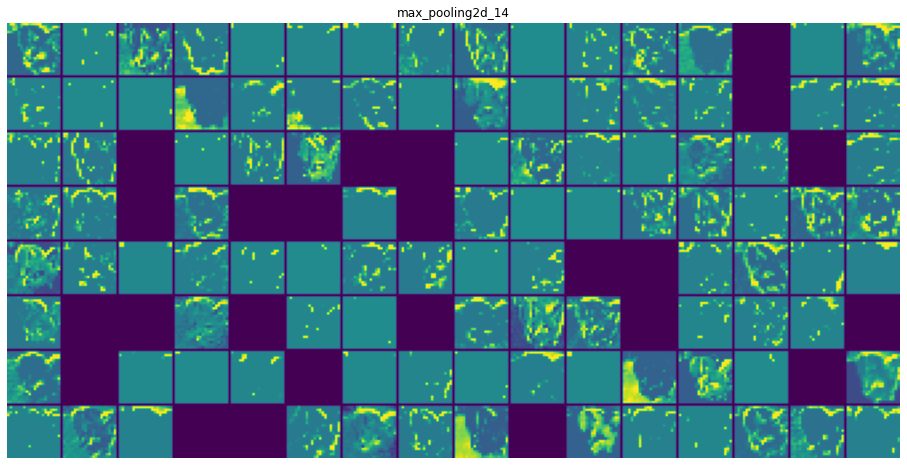

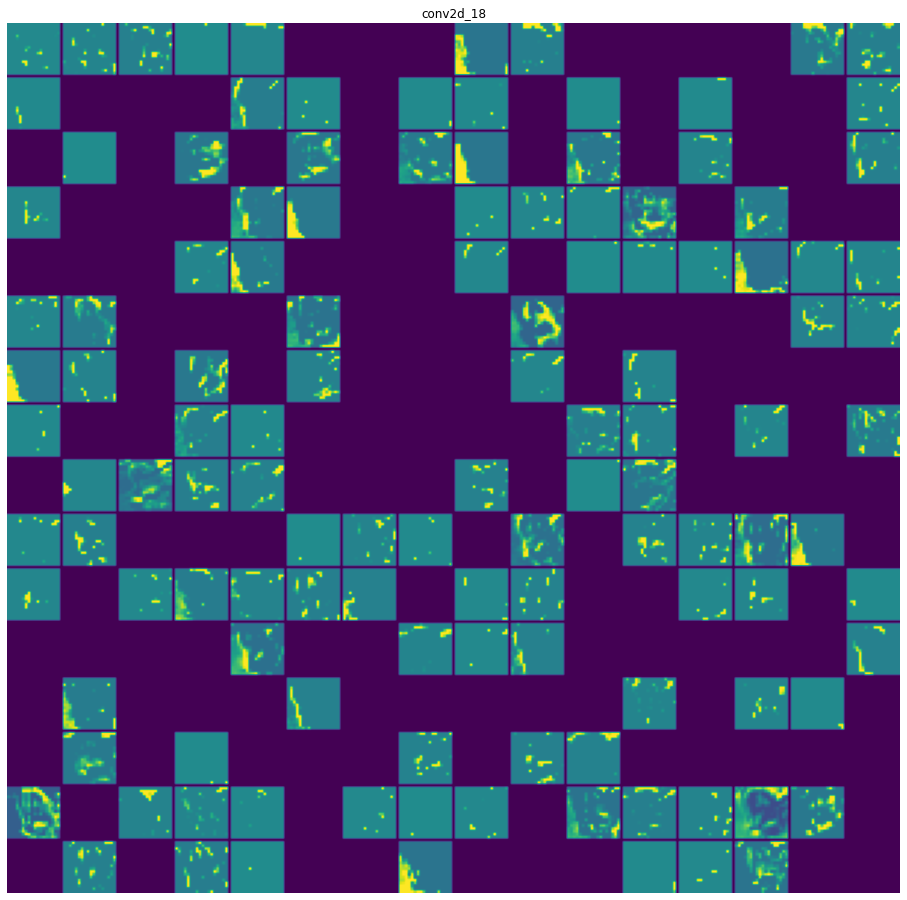

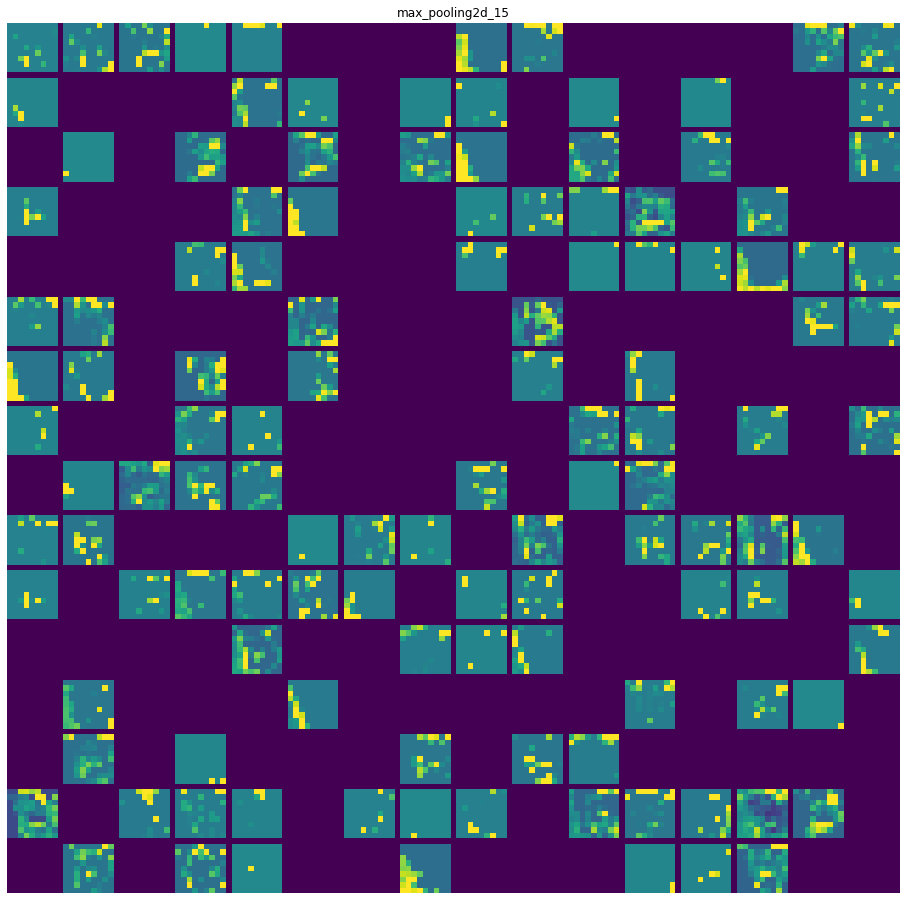

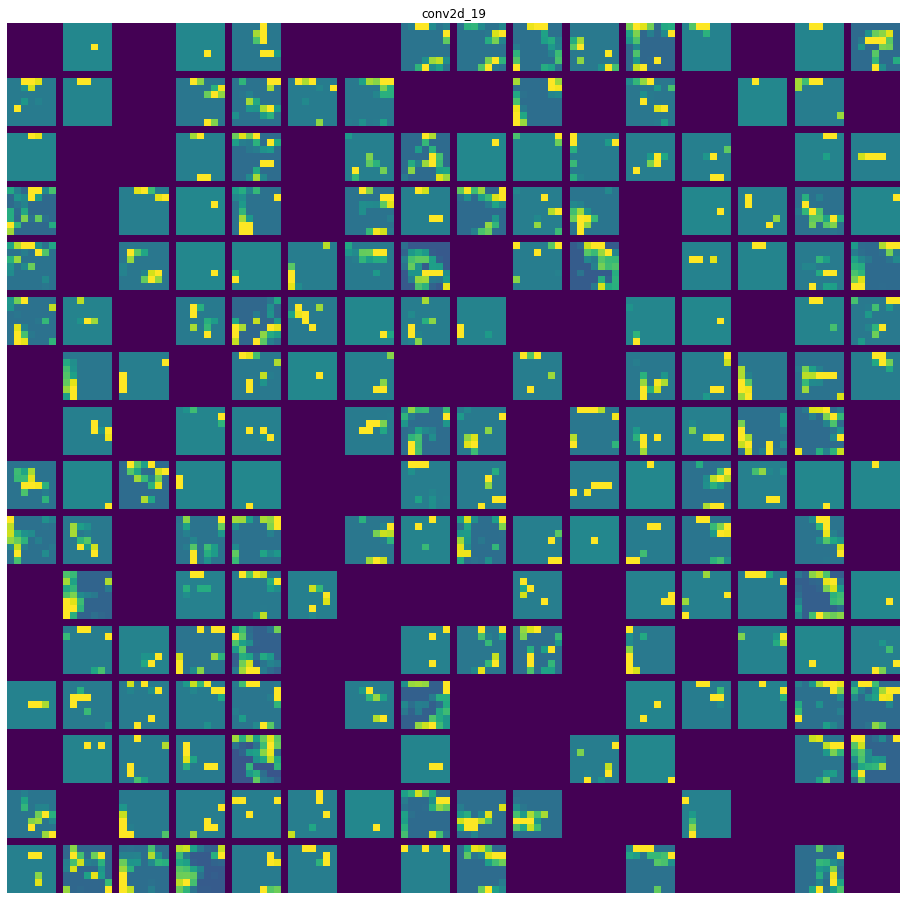

In [8]:
# number of images in a row
images_per_row = 16

# loop through the layer names and layer activations
for layer_name, layer_activation in zip(layer_names, activations):
    # layer_activation = (1, height, width, filters)
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    # number of rows
    cols = n_features // images_per_row

    # a cols x images_per_row grid, where each "cell" is (size + 1) pixels long
    display_grid = np.zeros(((size + 1) * cols - 1, images_per_row * (size + 1) - 1))

    # loop through each row and column
    for col in range(cols):
        for row in range(images_per_row):
            # the representative index and image
            ind = col * images_per_row + row
            img = layer_activation[0, :, :, ind].copy()

            # normalize the image and clip it into an appropriate format
            if img.sum() != 0:
                img -= img.mean()
                img /= img.std()
                img = img * 64 + 128
            img = np.clip(img, 0, 255).astype("uint8")

            # the relevant part of the grid is set to the image
            display_grid[
                col * (size + 1) : (col + 1) * size + col,
                row * (size + 1) : (row + 1) * size + row] = img

    # plot the fiture, add the title, etc.
    plt.figure(figsize=(images_per_row, cols))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")
